# Baseline model use autogluon

## **With EDA pandas_profiling,heatmap, some_img**

### Load libarays

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
print("done")

done


In [7]:
!cp -r /kaggle/input/autogluon-package/* ./
print("done")

done


In [8]:
!pip install -q --no-index --find-links='/kaggle/input/autogluon-package/' 'autogluon.tabular-0.7.0-py3-none-any.whl'
print("done")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.29.133 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
done


In [9]:
!pip install -q ray==2.2.0
print("done")

done


In [10]:
!pip install -q pandas_profiling
from pandas_profiling import ProfileReport

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.9.3 which is incompatible.


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_32/895419368.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

In [11]:
from autogluon.tabular import TabularPredictor, TabularDataset

In [20]:
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [13]:
path='../input/playground-series-s3e18/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
submission = pd.read_csv(path+'sample_submission.csv')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [16]:
path='/kaggle/working/'
profile = ProfileReport(train, title='Pandas Profiling Report', minimal=True)
profile.to_file(output_file=path+"output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile = ProfileReport(test, title='Pandas Profiling Report', minimal=True)
profile.to_file(output_file=path+"output2.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
train=train.drop("id",axis=1)
test=test.drop("id",axis=1)
columns_to_convert_uint8 = ['NumHeteroatoms', 'fr_COO', 'fr_COO2']
columns_to_convert_bool = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']
for column in columns_to_convert_uint8:
    train[column] = train[column].astype('uint8')
    test[column] = test[column].astype('uint8')
for column in columns_to_convert_bool:
    train[column] = train[column].astype('bool')

In [33]:
train.head()

BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v     Chi3v  \
0  323.390782   9.879918  5.875576   5.875576  4.304757   4.304757  2.754513   
1  273.723798   7.259037  4.441467   5.834958  3.285046   4.485235  2.201375   
2  521.643822  10.911303  8.527859  11.050864  6.665291   9.519706  5.824822   
3  567.431166  12.453343  7.089119  12.833709  6.478023  10.978151  7.914542   
4  112.770735   4.414719  2.866236   2.866236  1.875634   1.875634  1.036450   

      Chi4n  EState_VSA1  EState_VSA2  ...  SlogP_VSA3  VSA_EState9  fr_COO  \
0  1.749203     0.000000    11.938294  ...    4.794537    35.527357       0   
1  1.289775    45.135471     0.000000  ...   13.825658    44.707310       0   
2  1.770579    15.645394     6.606882  ...   17.964475    45.660120       0   
3  3.067181    95.639554     0.000000  ...   31.961948    87.509997       0   
4  0.727664    17.980451    12.841643  ...    9.589074    33.333333       2   

   fr_COO2    EC1    EC2    EC3    EC4    EC5    EC6  
0        0   True   True  False  False  False  False  
1        0  False   True   True  False  False  False  
2        0   True   True  False  False   True  False  
3        0   True   True  False  False  False  False  
4        2   True  False   True   True   True  False  

[5 rows x 37 columns]

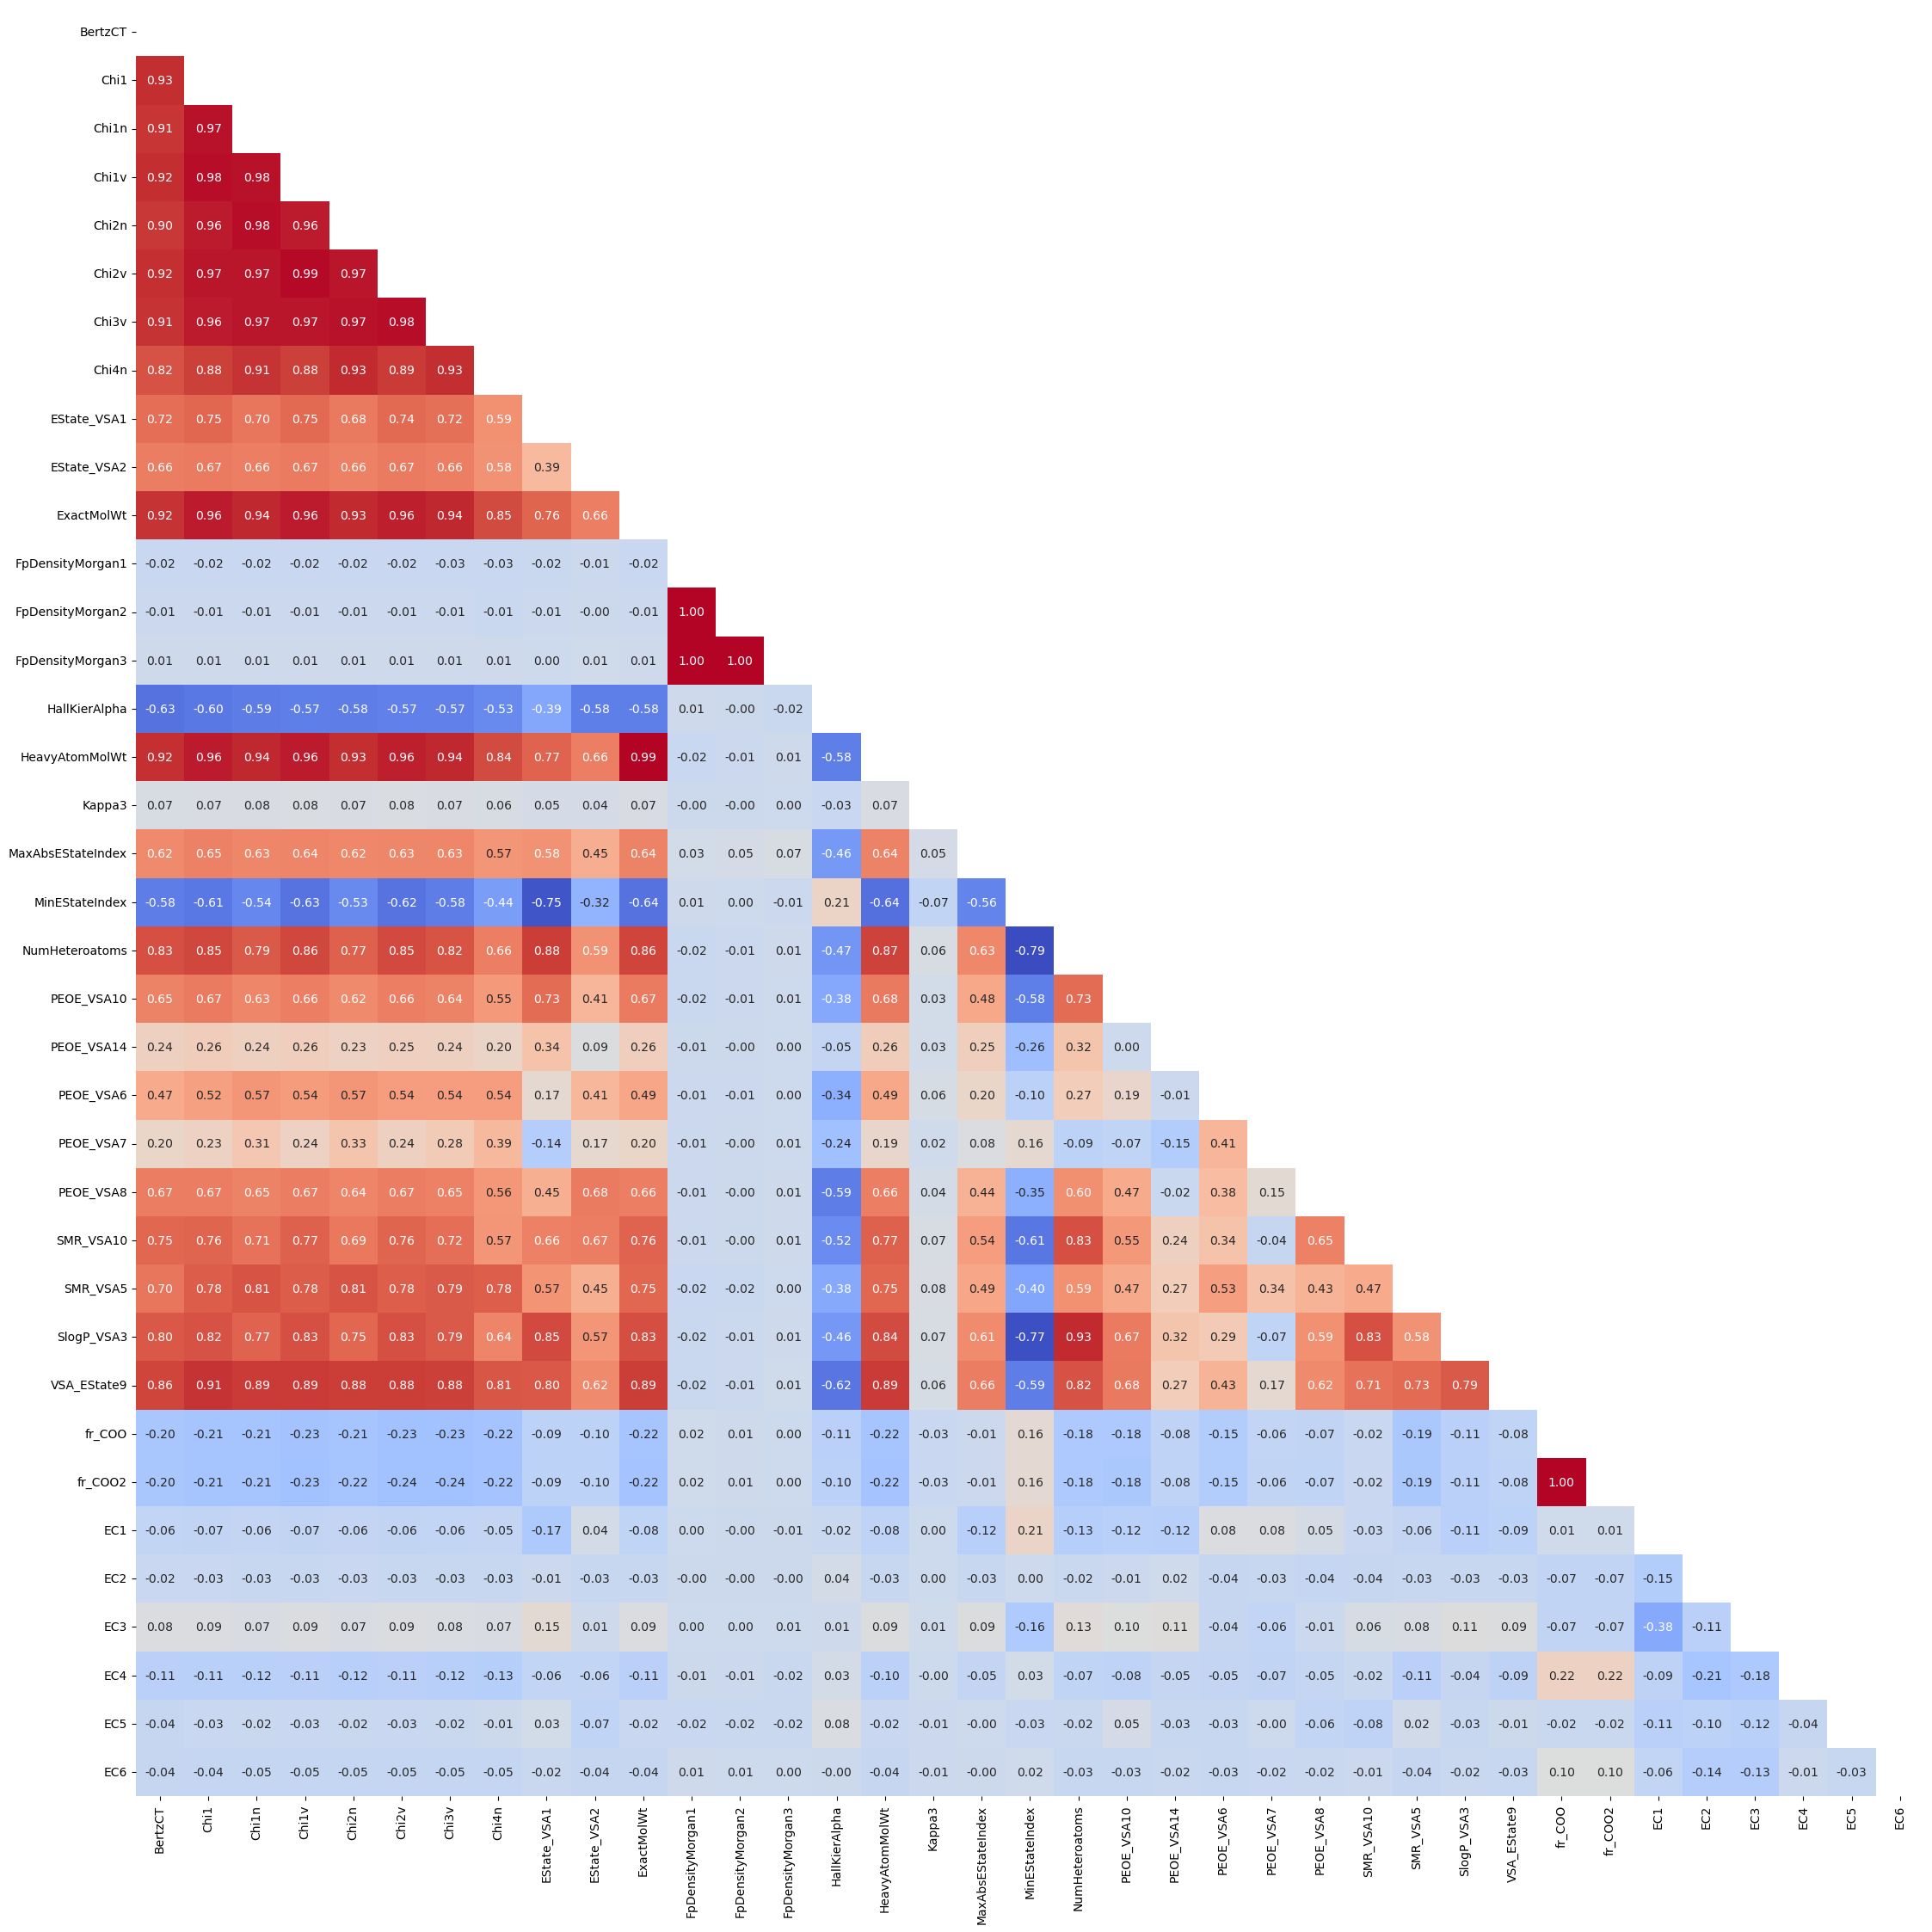

In [25]:
df_corr=train.drop(columns="id")
corr = df_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(27, 27))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", square=True, cmap='coolwarm',cbar=False)
plt.show()

In [34]:
train = TabularDataset(train)
test = TabularDataset(test)

In [42]:
trainEC1 = train.drop(columns=['EC6', 'EC2', 'EC3', 'EC4', 'EC5'])

In [43]:
excluded_model_types = ['KNN', 'NN_TORCH']
# predictor = TabularPredictor(label='Machine failure', problem_type='binary',
#                              eval_metric='log_loss',sample_weight='balance_weight').fit(train,presets="best_quality",
#                              auto_stack=True,fit_weighted_ensemble = True, save_space=True,excluded_model_types=excluded_model_types,
#                              num_stack_levels=3, num_bag_folds=5,num_bag_sets=12, num_gpus = 0, num_cpus = 4,time_limit=3600*10)

predictor1 = TabularPredictor(label='EC1', problem_type='binary',
                              eval_metric='roc_auc',sample_weight='balance_weight').fit(trainEC1,fit_weighted_ensemble = True,
                                                                                        save_space=True,excluded_model_types=excluded_model_types, num_cpus = 4,time_limit=500)

No path specified. Models will be saved in: "AutogluonModels/ag-20230627_035721/"
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ... Time limit = 500s
AutoGluon will save models to "AutogluonModels/ag-20230627_035721/"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Jun 24 10:55:41 UTC 2023
Train Data Rows:    14838
Train Data Columns: 31
Label Column: EC1
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Assigning sample weights to balance differences in frequency of classes.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    29356.68 MB
	Train Data (Original)  Memory Usage: 3.37 MB (0.0% of available memory)
	Inferring dat

In [45]:
feature_importance = predictor1.feature_importance(trainEC1)
feature_importance

Computing feature importance via permutation shuffling for 31 features using 5000 rows with 5 shuffle sets...
	85.15s	= Expected runtime (17.03s per shuffle set)
	44.62s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev       p_value  n  p99_high   p99_low
NumHeteroatoms       0.045907  0.003664  4.826643e-06  5  0.053451  0.038364
MinEStateIndex       0.040248  0.000659  8.633235e-09  5  0.041605  0.038890
SlogP_VSA3           0.031222  0.001007  1.297834e-07  5  0.033296  0.029148
EState_VSA1          0.030593  0.001030  1.542450e-07  5  0.032715  0.028471
PEOE_VSA10           0.028700  0.001208  3.763047e-07  5  0.031188  0.026211
SMR_VSA10            0.027671  0.000994  1.996563e-07  5  0.029718  0.025624
Chi1                 0.027485  0.001303  6.049676e-07  5  0.030169  0.024801
HeavyAtomMolWt       0.027400  0.000830  1.009501e-07  5  0.029109  0.025691
MaxAbsEStateIndex    0.025891  0.001009  2.764634e-07  5  0.027969  0.023813
Chi2v                0.025345  0.000993  2.822670e-07  5  0.027390  0.023300
Chi2n                0.025224  0.000906  1.996473e-07  5  0.027091  0.023358
ExactMolWt           0.025219  0.000485  1.638999e-08  5  0.026217  0.024221
SMR_VSA5             0.025215  0.001006  3.038180e-07  5  0.027288  0.023143
Chi3v                0.025191  0.001132  4.888261e-07  5  0.027522  0.022859
VSA_EState9          0.025137  0.000505  1.955528e-08  5  0.026177  0.024097
Chi1v                0.024855  0.000975  2.840926e-07  5  0.026863  0.022847
EState_VSA2          0.024385  0.001128  5.475295e-07  5  0.026707  0.022063
PEOE_VSA7            0.023821  0.000653  6.772612e-08  5  0.025166  0.022476
Chi4n                0.023651  0.001205  8.045581e-07  5  0.026131  0.021171
Chi1n                0.023620  0.000660  7.292746e-08  5  0.024978  0.022262
BertzCT              0.023300  0.001782  4.073593e-06  5  0.026969  0.019631
PEOE_VSA8            0.021822  0.000985  4.961458e-07  5  0.023849  0.019794
HallKierAlpha        0.021539  0.000649  9.907609e-08  5  0.022876  0.020201
FpDensityMorgan1     0.018740  0.000960  8.238958e-07  5  0.020717  0.016764
FpDensityMorgan2     0.017965  0.000976  1.040091e-06  5  0.019975  0.015956
FpDensityMorgan3     0.017253  0.000892  8.559223e-07  5  0.019091  0.015416
PEOE_VSA6            0.016502  0.001069  2.104997e-06  5  0.018704  0.014300
PEOE_VSA14           0.015912  0.000622  2.791715e-07  5  0.017192  0.014632
Kappa3               0.014910  0.000206  4.400416e-09  5  0.015334  0.014485
fr_COO               0.014565  0.000410  7.534731e-08  5  0.015410  0.013721
fr_COO2              0.014276  0.000196  4.273886e-09  5  0.014680  0.013872

In [37]:
# !pip install -q pygraphviz

In [46]:
# predictor1.plot_ensemble_model()

'AutogluonModels/ag-20230627_035721/ensemble_model.png'

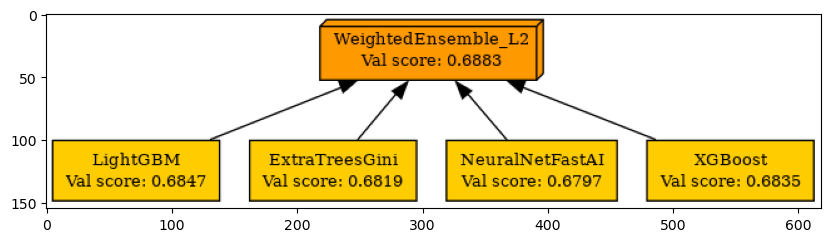

In [48]:
img = mpimg.imread('AutogluonModels/ag-20230627_035721/ensemble_model.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.show()

In [49]:
preds_EC1 = predictor1.predict_proba(test)

In [50]:
preds_EC1=preds_EC1.iloc[: , 1]

In [51]:
trainEC2 = train.drop(columns=['EC1', 'EC6', 'EC3', 'EC4', 'EC5'])

In [53]:
predictor2 = TabularPredictor(label='EC2', problem_type='binary',
                             eval_metric='roc_auc',sample_weight='balance_weight').fit(trainEC2,fit_weighted_ensemble = True,
                                                                                        save_space=True,excluded_model_types=excluded_model_types, num_cpus = 4,time_limit=500)

No path specified. Models will be saved in: "AutogluonModels/ag-20230627_040057/"
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ... Time limit = 500s
AutoGluon will save models to "AutogluonModels/ag-20230627_040057/"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Jun 24 10:55:41 UTC 2023
Train Data Rows:    14838
Train Data Columns: 31
Label Column: EC2
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Assigning sample weights to balance differences in frequency of classes.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    30146.33 MB
	Train Data (Original)  Memory Usage: 3.37 MB (0.0% of available memory)
	Inferring dat

[1000]	valid_set's binary_logloss: 0.621224
[2000]	valid_set's binary_logloss: 0.606802
[3000]	valid_set's binary_logloss: 0.602085


	0.5463	 = Validation score   (roc_auc)
	13.37s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 485.89s of the 485.88s of remaining time.


[1000]	valid_set's binary_logloss: 0.57398


	0.5542	 = Validation score   (roc_auc)
	6.72s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 478.9s of the 478.89s of remaining time.
	0.5809	 = Validation score   (roc_auc)
	6.52s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 472.09s of the 472.08s of remaining time.
	0.5746	 = Validation score   (roc_auc)
	7.97s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 463.84s of the 463.83s of remaining time.
	0.5349	 = Validation score   (roc_auc)
	41.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ... Training model for up to 421.95s of the 421.94s of remaining time.
	0.5661	 = Validation score   (roc_auc)
	2.56s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: ExtraTreesEntr ... Training model for up to 418.99s of the 418.98s of remaining time.
	0.5753

In [58]:
feature_importance = predictor2.feature_importance(trainEC2)
feature_importance

Computing feature importance via permutation shuffling for 31 features using 5000 rows with 5 shuffle sets...
	131.16s	= Expected runtime (26.23s per shuffle set)
	63.46s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev       p_value  n  p99_high   p99_low
VSA_EState9          0.010952  0.000477  4.308889e-07  5  0.011934  0.009970
Chi4n                0.008585  0.000907  1.474340e-05  5  0.010453  0.006717
SMR_VSA5             0.007369  0.000449  1.646958e-06  5  0.008293  0.006444
HallKierAlpha        0.007092  0.000717  1.238459e-05  5  0.008569  0.005615
BertzCT              0.006631  0.000801  2.503611e-05  5  0.008280  0.004982
Chi1v                0.005554  0.000527  9.605873e-06  5  0.006639  0.004469
Chi2n                0.005551  0.001005  1.237063e-04  5  0.007621  0.003481
SlogP_VSA3           0.005266  0.000607  2.084485e-05  5  0.006517  0.004016
MinEStateIndex       0.005140  0.000758  5.507291e-05  5  0.006700  0.003579
ExactMolWt           0.005016  0.000784  6.926055e-05  5  0.006629  0.003402
Chi1                 0.004902  0.000898  1.293816e-04  5  0.006752  0.003053
HeavyAtomMolWt       0.004821  0.000628  3.375546e-05  5  0.006114  0.003528
MaxAbsEStateIndex    0.004759  0.001084  3.022458e-04  5  0.006992  0.002526
Chi3v                0.004723  0.000611  3.290919e-05  5  0.005981  0.003465
Kappa3               0.004638  0.000444  9.995026e-06  5  0.005553  0.003723
fr_COO               0.004614  0.000363  4.569923e-06  5  0.005362  0.003867
Chi2v                0.004568  0.000731  7.602682e-05  5  0.006073  0.003063
SMR_VSA10            0.004457  0.000706  7.288244e-05  5  0.005910  0.003005
fr_COO2              0.004329  0.000496  2.030117e-05  5  0.005350  0.003308
FpDensityMorgan1     0.004299  0.000384  7.536172e-06  5  0.005089  0.003509
Chi1n                0.004201  0.000647  6.523740e-05  5  0.005533  0.002870
FpDensityMorgan3     0.004187  0.000323  4.204583e-06  5  0.004851  0.003522
EState_VSA2          0.004157  0.001411  1.373108e-03  5  0.007062  0.001253
EState_VSA1          0.004104  0.000447  1.666262e-05  5  0.005025  0.003183
PEOE_VSA10           0.003881  0.000539  4.365142e-05  5  0.004992  0.002771
NumHeteroatoms       0.003492  0.001269  1.769334e-03  5  0.006105  0.000879
FpDensityMorgan2     0.003458  0.000349  1.232504e-05  5  0.004177  0.002738
PEOE_VSA8            0.003148  0.000436  4.299450e-05  5  0.004045  0.002250
PEOE_VSA7            0.003118  0.000521  9.002267e-05  5  0.004190  0.002046
PEOE_VSA14           0.002732  0.000489  1.180946e-04  5  0.003739  0.001725
PEOE_VSA6            0.002291  0.000620  5.841336e-04  5  0.003567  0.001015

In [55]:
preds_EC2 = predictor2.predict_proba(test)

In [59]:
preds_EC2=preds_EC2.iloc[: , 1]

In [60]:
!rm -rf /kaggle/working/*

In [61]:
submission['EC1'] = preds_EC1
submission['EC2'] = preds_EC2
submission

id       EC1       EC2
0     14838  0.398857  0.778316
1     14839  0.763921  0.865365
2     14840  0.710037  0.731910
3     14841  0.701826  0.833814
4     14842  0.738362  0.855658
...     ...       ...       ...
9888  24726  0.573373  0.808495
9889  24727  0.684358  0.915039
9890  24728  0.313077  0.802757
9891  24729  0.322680  0.850928
9892  24730  0.284907  0.876075

[9893 rows x 3 columns]

In [62]:
submission.to_csv('/kaggle/working/submission.csv', index=False)